In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
df = pd.read_csv('laptop_data.csv')

In [219]:
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
41,41,Dell,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65kg,79866.7200
715,715,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 920MX,Windows 10,1.87kg,45664.6896
865,865,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.07kg,48484.8000
498,498,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.4kg,50562.7200
438,438,Lenovo,Ultrabook,14.0,2560x1440,Intel Core i7 7500U 2.7GHz,24GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.32kg,126912.9600


In [220]:
# checking the data-tyoe of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [221]:
# checking the duplicate rows
df.duplicated().sum()

0

In [222]:
# checking for missing values in dataset
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Data Pre-processing

In [223]:
# Removing the unwanted columns
df.drop(columns=['Unnamed: 0'], inplace = True)

In [224]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [225]:
# Removing 'GB' from the ram column
# '.str' transforms the series object to its string form 
# on which the actual string operation can be executed
df['Ram'] = df['Ram'].str.replace('GB','')

In [226]:
# Removing kg from weight column
df['Weight'] = df['Weight'].str.replace('kg','')

In [227]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [228]:
# changing the datatype of the columns
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float64')
df['Price'] = df['Price'].astype('int32')

In [229]:
# handing screen resolution
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [230]:
# lambda returns 1 if 'Touchscreen is present and 0 if not'
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [231]:
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

In [232]:
# lambda returns 1 if 'IPS' is present and 0 if not
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

In [233]:
# Spliting the resolution column
new_res = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [234]:
# assigning the values
df['X_res'] = new_res[0]
df['Y_res'] = new_res[1]
df['X_res'].value_counts()

Full HD 1920                                507
1366                                        281
IPS Panel Full HD 1920                      231
IPS Panel Full HD / Touchscreen 1920         53
Full HD / Touchscreen 1920                   47
1600                                         23
Touchscreen 1366                             16
Quad HD+ / Touchscreen 3200                  15
IPS Panel 4K Ultra HD 3840                   12
IPS Panel 4K Ultra HD / Touchscreen 3840     11
4K Ultra HD / Touchscreen 3840               10
4K Ultra HD 3840                              7
Touchscreen 2560                              7
IPS Panel 1366                                7
IPS Panel Quad HD+ / Touchscreen 3200         6
IPS Panel Retina Display 2560                 6
IPS Panel Retina Display 2304                 6
Touchscreen 2256                              6
IPS Panel Touchscreen 2560                    5
IPS Panel Retina Display 2880                 4
IPS Panel Touchscreen 1920              

In [235]:
# Cleaning X_res
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
# df['X_res'].str.replace(',','').str.findall(r'[0-9]+')
# df['X_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [236]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [237]:
# creating pipi column
df['pipi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float64')

In [238]:
# droping screenresolution column
df.drop(columns=['ScreenResolution','X_res','Y_res','Inches'], inplace=True)

In [239]:
df['cpu_name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [240]:
def fetch_processor(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [241]:
df['cpu_brand'] = df['cpu_name'].apply(fetch_processor)

In [242]:
df['cpu_brand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: cpu_brand, dtype: int64

In [243]:
df.drop(columns=['Cpu','cpu_name'], inplace=True)

In [244]:
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

In [245]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [246]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
new_memo = df['Memory'].str.split('+',n=1,expand = True)

df['first'] = new_memo[0]
df['first'] = df['first'].str.strip()
df['second'] = new_memo[1]
df['second'] = df['second'].str.strip()
df['Layer1HDD'] = df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df['second'].fillna('0',inplace=True)

df['Layer2HDD'] = df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

df['HDD'] = df['first']*df['Layer1HDD'] + df['second']*df['Layer2HDD']
df['SSD'] = df['first']*df['Layer1SSD'] + df['second']*df['Layer2SSD']
df['Hybrid'] = df['first']*df['Layer1Hybrid'] + df['second']*df['Layer2Hybrid']
df['Flash_Storage'] = df['first']*df['Layer1Flash_Storage'] + df['second']*df['Layer2Flash_Storage']

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage','Memory'], inplace = True)

In [247]:
df['Flash_Storage'].value_counts()

0      1228
32       38
64       16
256       8
16        7
128       4
512       2
Name: Flash_Storage, dtype: int64

In [248]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252207
pipi             0.473487
HDD             -0.096442
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [249]:
# df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [250]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [251]:
df[df.eq("ARM").any(1)]

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,pipi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage


In [252]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df = df[df['Gpu_brand'] != 'ARM'].reset_index(drop=True)
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

In [253]:
df.drop(columns=['Gpu'], inplace=True)

In [254]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [255]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/Linux/No_OS'

In [256]:
df['os'] = df['OpSys'].apply(cat_os)

In [257]:
df.drop(columns=['OpSys'], inplace=True)

In [258]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [259]:
def cat_comp(inp):
    if inp == 'Xiaomi' or inp == 'Vero' or inp == 'Chuwi' or inp == 'Google' or inp == 'Fujitsu' or inp == 'LG' or inp == 'Huawei' :
        return 'Other'
    else:
        return inp

In [260]:
df['Company'] = df['Company'].apply(cat_comp)

In [261]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Other         22
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Name: Company, dtype: int64

In [262]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,pipi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os
65,Asus,Ultrabook,16,1.80,105654,0,0,141.211998,Intel Core i7,0,512,0,0,Nvidia,Windows
252,Asus,Notebook,4,1.68,24988,0,0,100.454670,AMD Processor,1000,0,0,0,AMD,Windows
1060,HP,Notebook,8,2.04,57009,0,0,141.211998,Intel Core i7,0,256,0,0,Intel,Windows
679,Acer,Gaming,16,2.50,69210,0,0,141.211998,Intel Core i5,0,256,0,0,Nvidia,Windows
676,Asus,Ultrabook,8,1.10,60472,0,0,157.350512,Intel Core i5,0,256,0,0,Intel,Windows


## EDA

<AxesSubplot:xlabel='Price', ylabel='Count'>

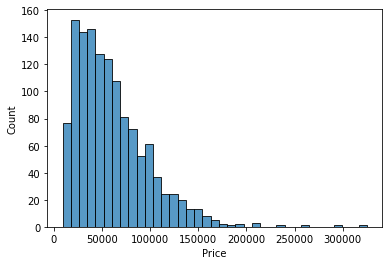

In [263]:
# checking the distribution of target column
sns.histplot(df['Price'])

<AxesSubplot:>

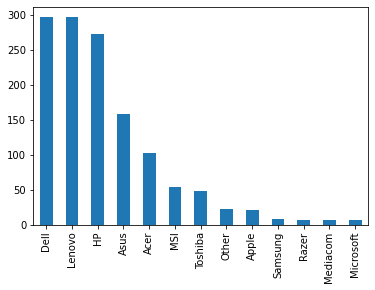

In [264]:
# Company column
df['Company'].value_counts().plot(kind='bar')

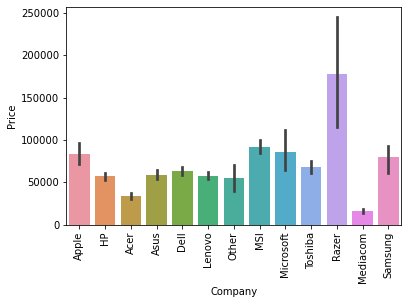

In [265]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [266]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

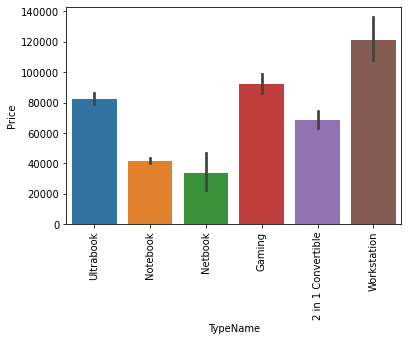

In [267]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

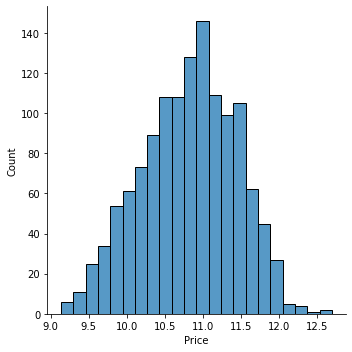

In [268]:
sns.displot(np.log(df['Price']))

## Model

In [269]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Other         22
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Name: Company, dtype: int64

In [270]:
# X = df.drop(columns=['Price'])
# y = np.log(df['Price'])

In [271]:
num_bins = int(np.floor(1 + np.log2(len(df))))
num_bins

11

In [272]:
df.loc[:, "bins"] = pd.cut( df["Price"], bins=5, labels=False)

In [273]:
df.head(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,pipi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os,bins
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac,0
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac,0
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/Linux/No_OS,0


In [274]:
df["bins"].value_counts()

0    921
1    329
2     45
3      5
4      2
Name: bins, dtype: int64

In [275]:
from sklearn import model_selection

In [276]:
split = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(df,df['bins']):
    train = df.loc[train_index]
    test = df.loc[test_index]

In [277]:
train.head(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,pipi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os,bins
738,MSI,Gaming,16,1.80,111593,0,0,141.211998,Intel Core i7,1000,256,0,0,Nvidia,Windows,1
790,Asus,Gaming,8,2.24,71341,0,0,141.211998,Intel Core i7,1000,128,0,0,Nvidia,Windows,0
609,Acer,Notebook,4,1.60,18594,0,0,111.935204,Other Intel Processor,0,0,0,128,Intel,Windows,0


In [278]:
for set_ in (train,test):
    set_.drop("bins", axis=1,inplace=True)

In [279]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)

In [56]:
train['bins'].value_counts()/len(test)

0    2.823755
1    1.007663
2    0.137931
3    0.015326
4    0.007663
Name: bins, dtype: float64

In [57]:
for set_ in (train,test):
    set_.drop("bins", axis=1,inplace=True)

In [58]:
test.sample(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,pipi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os
680,MSI,Gaming,8,2.20,53168,0,0,141.211998,Intel Core i5,0,256,0,0,Nvidia,Windows
630,Asus,Ultrabook,16,1.10,101232,0,0,157.350512,Intel Core i7,0,512,0,0,Intel,Windows
771,Samsung,2 in 1 Convertible,16,1.71,95850,1,0,146.860478,Intel Core i7,0,256,0,0,AMD,Windows


In [59]:
# Creating folds

#Creating a new column called kfold
train['kfold'] = -1

# # Shuffling the data
# train = train.sample(frac=1).reset_index(drop=True)

# # calculate the number of bins by Sturge's rule 
# # I take the floor of the value, you can also 
# # just round it 
# num_bins = int(np.floor(1 + np.log2(len(train))))

# # bin targets
# train.loc[:, "bins"] = pd.cut( df["Price"], bins=5, labels=False)

# # initiate the kfold class from model_selection module
# kf = model_selection.StratifiedKFold(n_splits=5)

# # fill the new kfold columns
# # note that, instead of targets, we use bins!
# for f, (t_, v_) in enumerate(kf.split(X=train, y=train['bins'].values)):
#     train.loc[v_,'kfold'] = f

# train = train.drop("bins", axis=1)

In [60]:
train = train.sample(frac=1).reset_index(drop=True)

In [61]:
num_bins = int(np.floor(1 + np.log2(len(train))))
num_bins

11

In [70]:
train.loc[:, "bins"] = pd.cut( df["Price"], bins=3, labels=False)

In [71]:
train['bins'].value_counts()

0    958
1     80
2      4
Name: bins, dtype: int64

In [72]:
kf = model_selection.StratifiedKFold(n_splits=4)

In [73]:
for f, (t_, v_) in enumerate(kf.split(X=train, y=train['bins'].values)):
    train.loc[v_,'kfold'] = f

In [74]:
train = train.drop("bins", axis=1)

In [75]:
train['kfold'].value_counts()

0    261
1    261
2    260
3    260
Name: kfold, dtype: int64

In [65]:
train.head(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,pipi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os,kfold,bins
0,HP,Notebook,4,1.86,23373,0,0,100.454670,Intel Core i3,500,0,0,0,AMD,Windows,0,0
1,Lenovo,Notebook,8,2.20,35644,0,1,141.211998,Intel Core i7,1000,0,0,0,Nvidia,Windows,0,0
2,HP,Notebook,4,1.86,13799,0,0,100.454670,Other Intel Processor,500,0,0,0,Intel,Others/Linux/No_OS,0,0
3,Asus,2 in 1 Convertible,8,1.20,61751,0,0,176.232574,Other Intel Processor,0,0,0,64,Intel,Others/Linux/No_OS,0,1
4,Lenovo,Notebook,8,2.20,31808,0,0,100.454670,Intel Core i5,0,256,0,0,Intel,Windows,0,1
